<a href="https://colab.research.google.com/github/Yurakc/platzi_data/blob/main/Aprendizaje%20Autom%C3%A1tico%20y%20Miner%C3%ADa%20De%20Datos/sesion%203/3_Visualizacion_b%C3%A1sica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro a Visualización de datos en python

### Cargamos el dataset

Vamos a usar un dataset clásico para empezar a aprender técnicas de visualización. Se trata del Boston Housing Dataset. Recopilado en 1976 y publicado en el Paper [Hedonic Housing Prices and the Demand for Clean Air](https://www.law.berkeley.edu/files/Hedonic.PDF)

Consiste en mediciones de distintas zonas del área de Boston, teniendo como variables independientes un conjunto de mediciones de la habitabilidad de dichas zonas, y como variable independiente el valor medio de las casas en dicha zona.

En concreto vamos a usar un [dataset actualizado](http://lib.stat.cmu.edu/datasets/boston_corrected.txt) que incluye la geolocalización estimada de las mediciones.

In [ ]:
import pandas as pd
df = pd.read_csv("boston_dataset.csv")
df.head()

,TOWN,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [ ]:
df = df.rename(columns={
    "TOWN":"CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "ZN":"PCT_ZONA_RESIDENCIAL",
    "INDUS":"PCT_ZONA_INDUSTRIAL",
    "CHAS":"RIO_CHARLES",
    "NOX":"OXIDO_NITROSO_PPM",
    "RM":"N_HABITACIONES_MEDIO",
    "AGE":"PCT_CASAS_40S",
    "DIS_EMPLEO":"DISTANCIA_CENTRO_EMPLEO",
    "RAD":"DIS_AUTOPISTAS",
    "TAX":"CARGA_FISCAL",
    "PTRATIO":"RATIO_PROFESORES",
    "B":"PCT_NEGRA",
    "MEDV":"VALOR_MEDIANO",
    "LSTAT":"PCT_CLASE_BAJA"
})

df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [ ]:
df.dtypes

CIUDAD                   object
LON                     float64
LAT                     float64
VALOR_MEDIANO           float64
INDICE_CRIMEN           float64
PCT_ZONA_RESIDENCIAL    float64
PCT_ZONA_INDUSTRIAL     float64
RIO_CHARLES               int64
OXIDO_NITROSO_PPM       float64
N_HABITACIONES_MEDIO    float64
PCT_CASAS_40S           float64
DIS                     float64
DIS_AUTOPISTAS            int64
CARGA_FISCAL              int64
RATIO_PROFESORES        float64
PCT_NEGRA               float64
PCT_CLASE_BAJA          float64
dtype: object

### Gráficos básicas con pandas

### Cómo elegir el gráfico

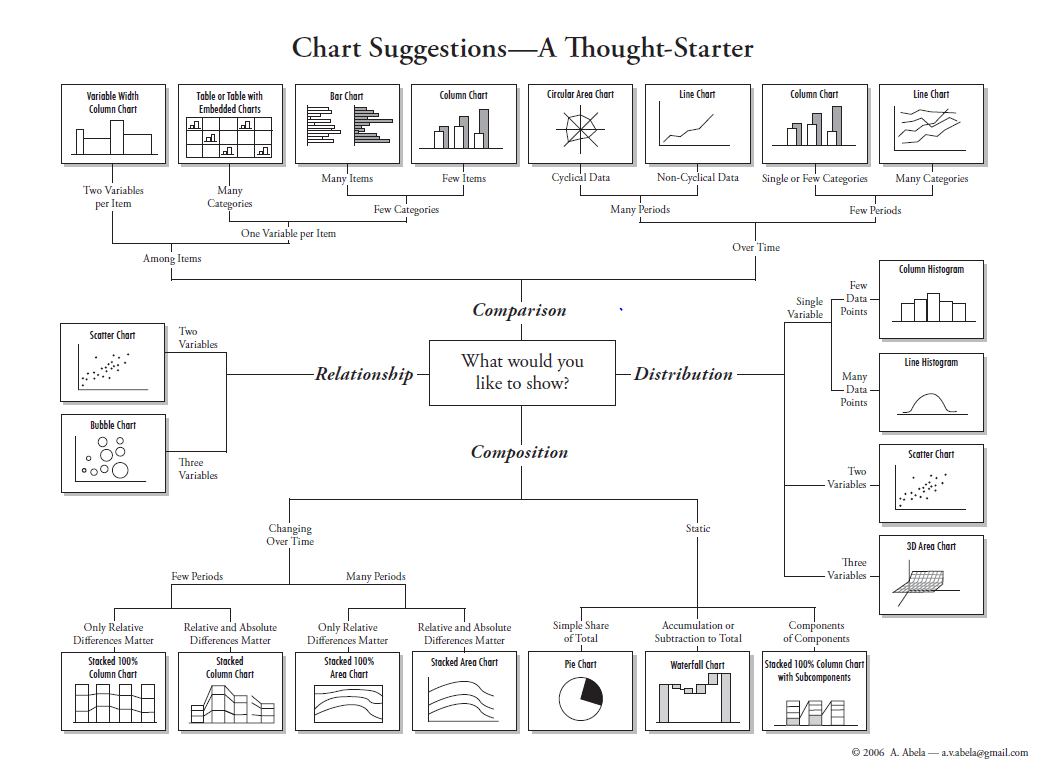

In [ ]:
from IPython.display import Image
Image("chart-chooser-data-visualization.png")


[Aquí hay una herramienta online para ayudar a decidir el tipo de gráfico a usar](http://labs.juiceanalytics.com/chartchooser/index.html)

Pandas usa [matplotlib](https://matplotlib.org/) como backend. [Aquí](https://pandas.pydata.org/pandas-docs/stable/visualization.html) está la documentación de visualización de Pandas

In [ ]:
import matplotlib.pyplot as plt
plt.close("all")
# set the plots to display in the Jupyter notebook
%matplotlib inline

### Scatter Plot / gráfico de dispersión

Los gráficos de dispersión son una de las mejores formas de representar la relación entre dos variables

In [ ]:
%matplotlib inline

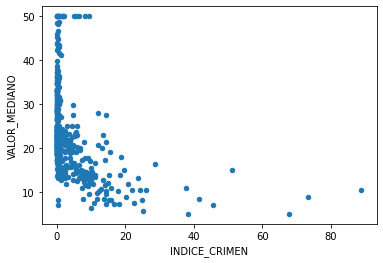

In [ ]:
df.plot.scatter(x="INDICE_CRIMEN", y="VALOR_MEDIANO")

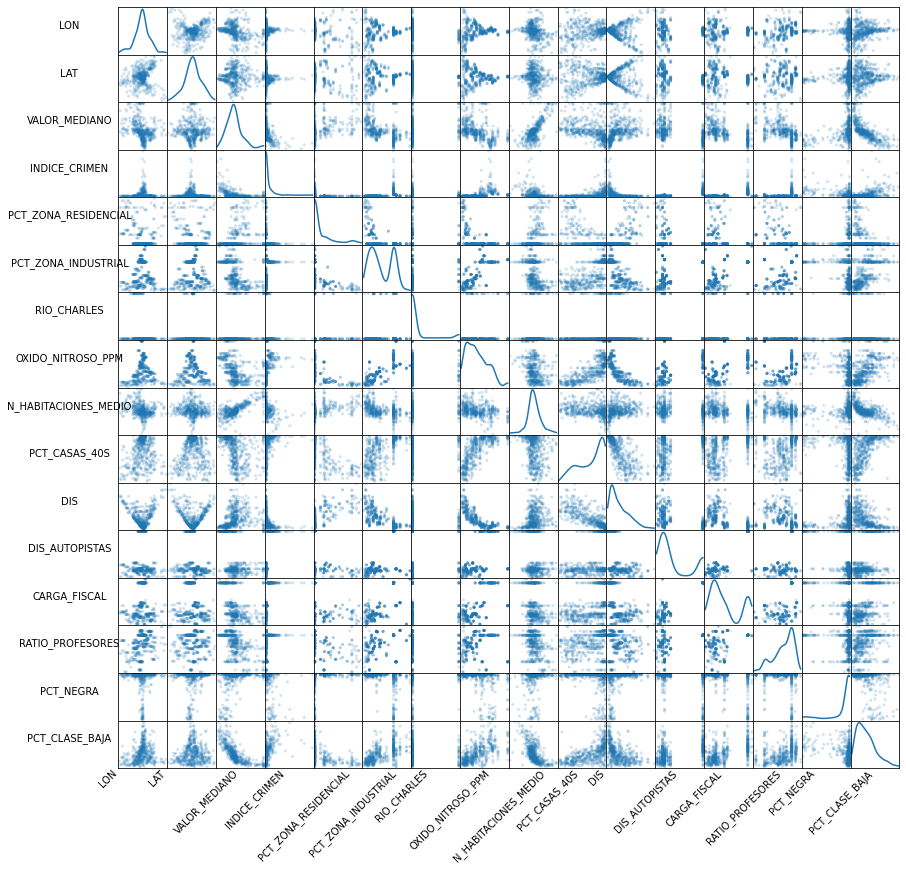

In [ ]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(df, alpha=0.2, figsize=(14, 14), diagonal='kde')

#https://stackoverflow.com/questions/32560932/how-to-customize-a-scatter-matrix-to-see-all-titles
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(-0.2,0) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)];

### Histograma

Los histogramas se usan para representar la distribucion de una variable, esto es, que rango de valores tiene, cuales son los valores más comunes

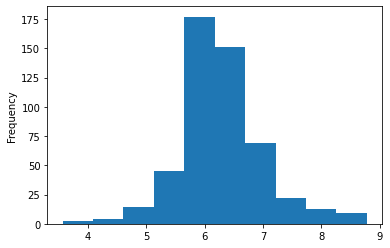

In [ ]:
df.N_HABITACIONES_MEDIO.plot.hist()

podemos especificar cuantos grupos queremos en el histograma

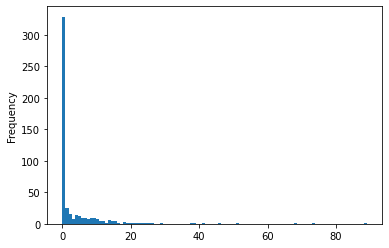

In [ ]:
df.INDICE_CRIMEN.plot.hist(bins=100)

Tambien podemos filtrar el gráfico poniendo límites a los ejes

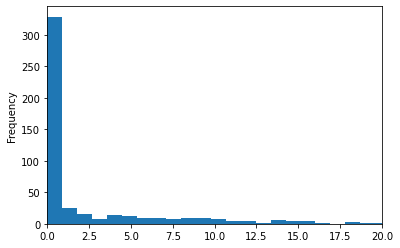

In [ ]:
df.INDICE_CRIMEN.plot.hist(bins=100, xlim=(0,20))

### Gráfico de barras/columnas

Los gráficos de barras se utilizan comúnmente para representar y comparar una variable entre distintos grupos

In [ ]:
valor_por_ciudad = df.groupby("CIUDAD")["VALOR_MEDIANO"].mean()
valor_por_ciudad.head(10)

CIUDAD
Arlington                  25.200000
Ashland                    21.400000
Bedford                    30.100000
Belmont                    36.200000
Beverly                    20.800000
Boston Allston-Brighton    20.912500
Boston Back Bay            32.400000
Boston Beacon Hill         50.000000
Boston Charlestown         12.650000
Boston Dorchester          17.745455
Name: VALOR_MEDIANO, dtype: float64

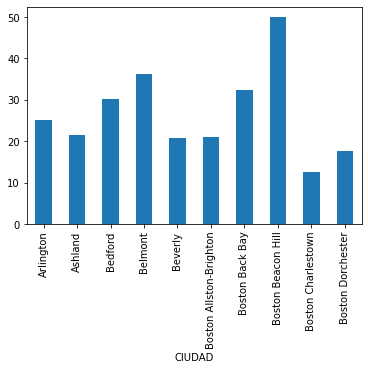

In [ ]:
valor_por_ciudad.head(10).plot.bar()

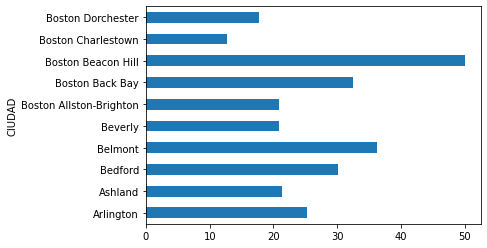

In [ ]:
valor_por_ciudad.head(10).plot.barh()

## Gráfico de linea

Los gráficos de linea se usan principalmente para representar tendencias, esto es, se usan para variables que varian con el tiempo


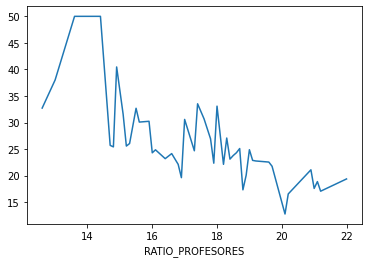

In [ ]:
df.groupby("RATIO_PROFESORES").VALOR_MEDIANO.mean().plot.line();

### Diagrama de caja (Box Plot)

Los diagramas de caja son útiles a la hora de representar grupos de datos y comparar entre ellos. Otra ventaja de los boxplots es que identifican de forma sencilla si una variable tiene muchos outliers, esto es, elementos que se alejan de los valores frecuentes de dicha variable.

In [ ]:
df["VALOR_CUANTILES"] = pd.qcut(df.VALOR_MEDIANO, 4)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


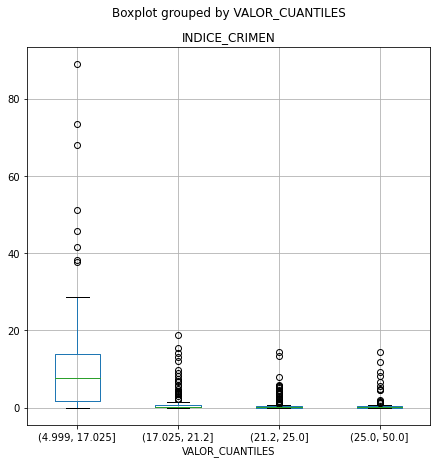

In [ ]:
df.boxplot(column="INDICE_CRIMEN", by="VALOR_CUANTILES", figsize=(7,7))

### Gráfico circular

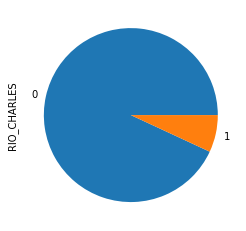

In [ ]:
df.RIO_CHARLES.value_counts().plot.pie()

https://conda-forge.github.io/
    
    https://anaconda.org/conda-forge/repo
        https://seaborn.pydata.org/
            
            http://bokeh.pydata.org/en/latest/
                
                https://altair-viz.github.io/
                    
                    https://plot.ly/python/getting-started/


https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
`conda install -c conda-forge ipywidgets`

https://github.com/bokeh/bokeh/blob/0.12.5/examples/howto/notebook_comms/Jupyter%20Interactors.ipynb